<a href="https://colab.research.google.com/github/Carlos-39/Talleres-RN/blob/main/Taller1_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1 - Redes Neuronales

##Integrantes:
- Carlos Daniel Corrales Arango (2122878)
- Jose Manuel Palma (2125182)

### Contenido del Notebook:
- El notebook como punto inicial tiene a la base inicial proporcionado en el taller para tener referencia de la red con la que se esta trabajando.
- Cada uno de los puntos del taller con su respectivo analisis y teoria en orden.
- Referencias.

# Base del taller


##Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Datos de Carros

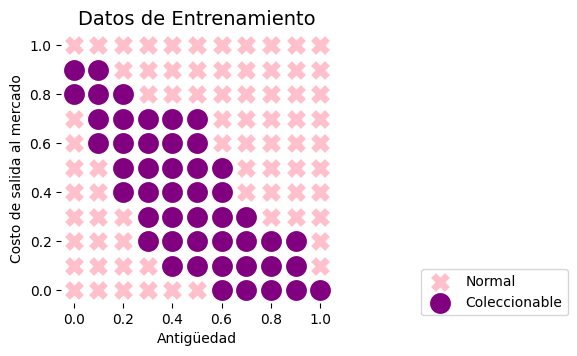

In [ ]:
# Datos de 121 carros -> [Antigüedad, costo de salida al mercado]

x = np.array([[0.0, 1.0], [0.1, 1.0], [0.2, 1.0], [0.3, 1.0], [0.4, 1.0],
              [0.5, 1.0], [0.6, 1.0], [0.7, 1.0], [0.8, 1.0], [0.9, 1.0],
              [1.0, 1.0], [0.0, 0.9], [0.1, 0.9], [0.2, 0.9], [0.3, 0.9],
              [0.4, 0.9], [0.5, 0.9], [0.6, 0.9], [0.7, 0.9], [0.8, 0.9],
              [0.9, 0.9], [1.0, 0.9], [0.0, 0.8], [0.1, 0.8], [0.2, 0.8],
              [0.3, 0.8], [0.4, 0.8], [0.5, 0.8], [0.6, 0.8], [0.7, 0.8],
              [0.8, 0.8], [0.9, 0.8], [1.0, 0.8], [0.0, 0.7], [0.1, 0.7],
              [0.2, 0.7], [0.3, 0.7], [0.4, 0.7], [0.5, 0.7], [0.6, 0.7],
              [0.7, 0.7], [0.8, 0.7], [0.9, 0.7], [1.0, 0.7], [0.0, 0.6],
              [0.1, 0.6], [0.2, 0.6], [0.3, 0.6], [0.4, 0.6], [0.5, 0.6],
              [0.6, 0.6], [0.7, 0.6], [0.8, 0.6], [0.9, 0.6], [1.0, 0.6],
              [0.0, 0.5], [0.1, 0.5], [0.2, 0.5], [0.3, 0.5], [0.4, 0.5],
              [0.5, 0.5], [0.6, 0.5], [0.7, 0.5], [0.8, 0.5], [0.9, 0.5],
              [1.0, 0.5], [0.0, 0.4], [0.1, 0.4], [0.2, 0.4], [0.3, 0.4],
              [0.4, 0.4], [0.5, 0.4], [0.6, 0.4], [0.7, 0.4], [0.8, 0.4],
              [0.9, 0.4], [1.0, 0.4], [0.0, 0.3], [0.1, 0.3], [0.2, 0.3],
              [0.3, 0.3], [0.4, 0.3], [0.5, 0.3], [0.6, 0.3], [0.7, 0.3],
              [0.8, 0.3], [0.9, 0.3], [1.0, 0.3], [0.0, 0.2], [0.1, 0.2],
              [0.2, 0.2], [0.3, 0.2], [0.4, 0.2], [0.5, 0.2], [0.6, 0.2],
              [0.7, 0.2], [0.8, 0.2], [0.9, 0.2], [1.0, 0.2], [0.0, 0.1],
              [0.1, 0.1], [0.2, 0.1], [0.3, 0.1], [0.4, 0.1], [0.5, 0.1],
              [0.6, 0.1], [0.7, 0.1], [0.8, 0.1], [0.9, 0.1], [1.0, 0.1],
              [0.0, 0.0], [0.1, 0.0], [0.2, 0.0], [0.3, 0.0], [0.4, 0.0],
              [0.5, 0.0], [0.6, 0.0], [0.7, 0.0], [0.8, 0.0], [0.9, 0.0],
              [1.0, 0.0]])

# 0 : normal    1 : coleccionable

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
              0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
              0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión
plt.figure(figsize=(3.5, 3.5))
plt.title("Datos de Entrenamiento", fontsize=14)
plt.scatter(x[y == 0].T[0], x[y == 0].T[1],
            marker="x", s=100, color="pink", linewidths=5, label="Normal")
plt.scatter(x[y == 1].T[0], x[y == 1].T[1],
            marker="o", s=100, color="purple", linewidths=5, label="Coleccionable")
plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.show()

##Red Neuronal Artificial "Simplista"

In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x # Características de entrada
    self.y = y # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  def entrenamiento(self, tasa_aprendizaje=0.1, epocas=1000):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0
      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21
      print(error)

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x, y)
red_neuronal.entrenamiento()

23.460430882879
15.94189591348626
14.729612535642605
14.581292209924882
14.551437806411782
14.542696754635514
14.538522545151524
14.535365579517377
14.532410909980435
14.529467124605224
14.52648790936074
14.523460866710204
14.520381510870585
14.51724717252726
14.514055567893974
14.510804461622138
14.507491586438945
14.504114623118223
14.500671194688238
14.497158864060768
14.49357513255322
14.489917438724161
14.486183157403085
14.48236959890468
14.47847400844597
14.474493565792452
14.470425385164244
14.46626651543513
14.462013940661064
14.457664580976855
14.453215293902854
14.44866287610591
14.444004065661803
14.439235544868513
14.434353943662465
14.429355843691274
14.42423778309895
14.418996262080055
14.413627749260307
14.408128688960947
14.402495509403124
14.396724631907082
14.390812481137191
14.38475549644027
14.378550144318258
14.372192932069396
14.365680422622415
14.359009250577518
14.35217613945477
14.34517792013519
14.338011550462555
14.330674135954728
14.323162951551096
14.31547

##Exploración los resultados de la Red Neuronal entrenada

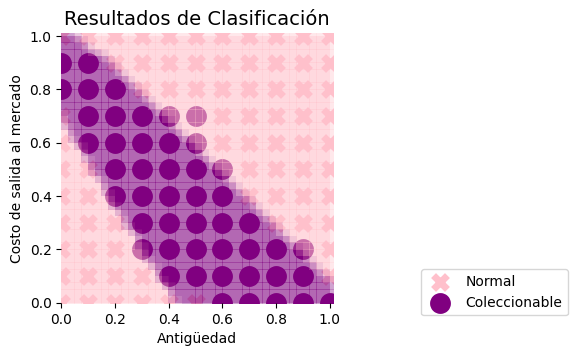

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.title("Resultados de Clasificación", fontsize=14)

plt.scatter(x[y == 0].T[0],
            x[y == 0].T[1],
            marker="x", s=100, color="pink",
            linewidths=5, label="Normal")
plt.scatter(x[y == 1].T[0],
            x[y == 1].T[1],
            marker="o", s=100, color="purple",
            linewidths=5, label="Coleccionable")

for antiguedad in np.arange(0, 1.01, 0.025):
  for costo in np.arange(0, 1.01, 0.025):
    color = red_neuronal.clasificacion(antiguedad, costo)
    if color == 1:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="purple", alpha=0.2, linewidths=0)
    else:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="pink", alpha=0.2, linewidths=0)

plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

# Punto 1



### Modificación de datos de entrenamiento

- Se agregaron 50 nuevos puntos generados aleatoriamente. Y por otro lado, se modificaron las etiquetas clasificando a los autos como coleccionables (y = 1) a los que tienen una antiguedad alta (x1 > 0.6) y alto costo (x2 > 0.6).

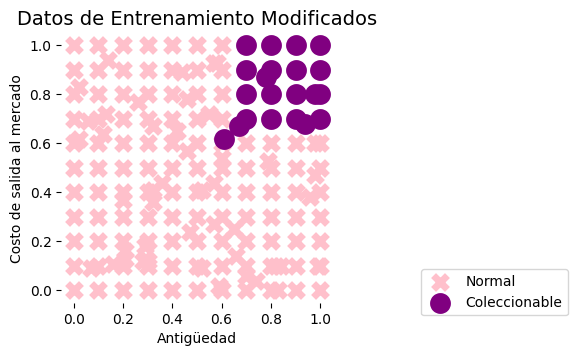

In [ ]:
# Se aumenta la cantidad de datos y se cambia la distribución
np.random.seed(0)  # Para reproducibilidad

# Se generan nuevos puntos aleatorios
nuevos_x = np.random.rand(50, 2)  # 50 nuevos puntos aleatorios
nuevos_x = np.round(nuevos_x, 2)  # Redondear a 1 decimal

# X original, lo modificaremos mas adelante

x = np.array([[0.0, 1.0], [0.1, 1.0], [0.2, 1.0], [0.3, 1.0], [0.4, 1.0],
              [0.5, 1.0], [0.6, 1.0], [0.7, 1.0], [0.8, 1.0], [0.9, 1.0],
              [1.0, 1.0], [0.0, 0.9], [0.1, 0.9], [0.2, 0.9], [0.3, 0.9],
              [0.4, 0.9], [0.5, 0.9], [0.6, 0.9], [0.7, 0.9], [0.8, 0.9],
              [0.9, 0.9], [1.0, 0.9], [0.0, 0.8], [0.1, 0.8], [0.2, 0.8],
              [0.3, 0.8], [0.4, 0.8], [0.5, 0.8], [0.6, 0.8], [0.7, 0.8],
              [0.8, 0.8], [0.9, 0.8], [1.0, 0.8], [0.0, 0.7], [0.1, 0.7],
              [0.2, 0.7], [0.3, 0.7], [0.4, 0.7], [0.5, 0.7], [0.6, 0.7],
              [0.7, 0.7], [0.8, 0.7], [0.9, 0.7], [1.0, 0.7], [0.0, 0.6],
              [0.1, 0.6], [0.2, 0.6], [0.3, 0.6], [0.4, 0.6], [0.5, 0.6],
              [0.6, 0.6], [0.7, 0.6], [0.8, 0.6], [0.9, 0.6], [1.0, 0.6],
              [0.0, 0.5], [0.1, 0.5], [0.2, 0.5], [0.3, 0.5], [0.4, 0.5],
              [0.5, 0.5], [0.6, 0.5], [0.7, 0.5], [0.8, 0.5], [0.9, 0.5],
              [1.0, 0.5], [0.0, 0.4], [0.1, 0.4], [0.2, 0.4], [0.3, 0.4],
              [0.4, 0.4], [0.5, 0.4], [0.6, 0.4], [0.7, 0.4], [0.8, 0.4],
              [0.9, 0.4], [1.0, 0.4], [0.0, 0.3], [0.1, 0.3], [0.2, 0.3],
              [0.3, 0.3], [0.4, 0.3], [0.5, 0.3], [0.6, 0.3], [0.7, 0.3],
              [0.8, 0.3], [0.9, 0.3], [1.0, 0.3], [0.0, 0.2], [0.1, 0.2],
              [0.2, 0.2], [0.3, 0.2], [0.4, 0.2], [0.5, 0.2], [0.6, 0.2],
              [0.7, 0.2], [0.8, 0.2], [0.9, 0.2], [1.0, 0.2], [0.0, 0.1],
              [0.1, 0.1], [0.2, 0.1], [0.3, 0.1], [0.4, 0.1], [0.5, 0.1],
              [0.6, 0.1], [0.7, 0.1], [0.8, 0.1], [0.9, 0.1], [1.0, 0.1],
              [0.0, 0.0], [0.1, 0.0], [0.2, 0.0], [0.3, 0.0], [0.4, 0.0],
              [0.5, 0.0], [0.6, 0.0], [0.7, 0.0], [0.8, 0.0], [0.9, 0.0],
              [1.0, 0.0]])

# Se mantienen los puntos originales y se agregan los nuevos
x_modificado = np.vstack(( x,nuevos_x))

# Modificacion de las etiquetas -> Autos coleccionables tienen alta antigüedad y alto costo
y_modificado = np.array([
    1 if (x1 > 0.6 and x2 > 0.6) else 0 for x1, x2 in x_modificado
])

# Gráfica de dispersión
plt.figure(figsize=(3.5, 3.5))
plt.title("Datos de Entrenamiento Modificados", fontsize=14)
plt.scatter(x_modificado[y_modificado == 0].T[0], x_modificado[y_modificado == 0].T[1],
            marker="x", s=100, color="pink", linewidths=5, label="Normal")
plt.scatter(x_modificado[y_modificado == 1].T[0], x_modificado[y_modificado == 1].T[1],
            marker="o", s=100, color="purple", linewidths=5, label="Coleccionable")
plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))
plt.show()

## Modificación de "Red Neuronal Simplista"

- Ahora al finalizar cada epoch se imprime lo siguiente:
  - Número de epoch.
  - Valor de los pesos/bias al inicio del epoch.
  - Valores actualizados al finalizar.
  - Error de la red para el entrenamiento.

- Nota: se aumento el numero de epochs a 3000 para probar que la red disminuyera su error, se dejo en 3000 para no hacer el proceso muy largo, pero se probo hasta con un maximo de 10.000 pero desde los 4000 aproximadamente el error cambia muy poco, entonces no tiene sentido ponerle mas de 3000 o 4000 ya que la diferencia en el error de la red en cada epoch va a ser minimo.

In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  def entrenamiento(self, tasa_aprendizaje=0.1, epocas=3000):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
red_neuronal.entrenamiento()

Streaming output truncated to the last 5000 lines.
Error de la red: 2.4063454672123856

Epoch 2287
Pesos iniciales: [-3.03319074  8.37703979 -7.41206278 -3.05595827], [-10.32688757   6.83157278]
Bias iniciales: [ 7.94913491 -2.18448703], [-0.62435397]
Pesos actualizados: [-3.02890514  8.38414903 -7.41560088 -3.06421692], [-10.32748494   6.83415425]
Bias actualizados: [ 7.94610457 -2.18339252], [-0.62955818]
Error de la red: 2.4043645530583926

Epoch 2288
Pesos iniciales: [-3.02890514  8.38414903 -7.41560088 -3.06421692], [-10.32748494   6.83415425]
Bias iniciales: [ 7.94610457 -2.18339252], [-0.62955818]
Pesos actualizados: [-3.02460761  8.39125962 -7.41914971 -3.07247815], [-10.32808273   6.83674002]
Bias actualizados: [ 7.9430631  -2.18229642], [-0.63478125]
Error de la red: 2.4023780951235567

Epoch 2289
Pesos iniciales: [-3.02460761  8.39125962 -7.41914971 -3.07247815], [-10.32808273   6.83674002]
Bias iniciales: [ 7.9430631  -2.18229642], [-0.63478125]
Pesos actualizados: [-3.0202

##Exploración los resultados de la Red Neuronal entrenada

Se añade esta sección para evidenciar que efectivamente la red esta bien entrenada.

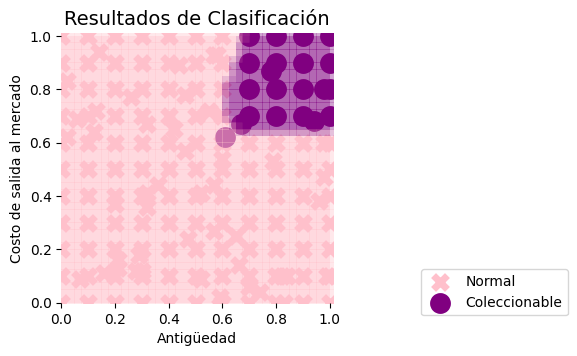

In [ ]:
plt.figure(figsize=(3.5, 3.5))
plt.title("Resultados de Clasificación", fontsize=14)

plt.scatter(x_modificado[y_modificado == 0].T[0],
            x_modificado[y_modificado == 0].T[1],
            marker="x", s=100, color="pink",
            linewidths=5, label="Normal")
plt.scatter(x_modificado[y_modificado == 1].T[0],
            x_modificado[y_modificado == 1].T[1],
            marker="o", s=100, color="purple",
            linewidths=5, label="Coleccionable")

for antiguedad in np.arange(0, 1.01, 0.025):
  for costo in np.arange(0, 1.01, 0.025):
    color = red_neuronal.clasificacion(antiguedad, costo)
    if color == 1:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="purple", alpha=0.2, linewidths=0)
    else:
      plt.scatter(antiguedad, costo, marker="s", s=110,
                  color="pink", alpha=0.2, linewidths=0)

plt.xlabel("Antigüedad", fontsize=10)
plt.ylabel("Costo de salida al mercado", fontsize=10)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

#Punto 2
A continuacion entrenaremos la red neuronal usando backpropagation, para ello, vamos a realizar 3 pruebas cada una con un valor de taza de aprendizaje y numero de epocs diferentes.

## Prueba 1
Para esta primera prueba usaremos una tasa de aprendizaje de 0.9 y 10000 epocas

In [ ]:
# Libreria para obtener el tiempo que toma completar el entrenamiento
import time

# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):

    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")



  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.9,10000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")

Se han truncado las últimas 5000 líneas del flujo de salida.

Epoch 9287
Pesos iniciales: [  8.90441431  57.46484766 -52.98186877 -15.46955797], [-27.36976915  25.05724375]
Bias iniciales: [ 25.624671   -23.82866919], [-14.39087493]
Pesos actualizados: [  8.90470166  57.46504488 -52.98210283 -15.46937213], [-27.37004309  25.05873615]
Bias actualizados: [ 25.62487772 -23.82921811], [-14.38988511]
Error de la red: 0.006601144511984649

Epoch 9288
Pesos iniciales: [  8.90470166  57.46504488 -52.98210283 -15.46937213], [-27.37004309  25.05873615]
Bias iniciales: [ 25.62487772 -23.82921811], [-14.38988511]
Pesos actualizados: [  8.90498931  57.4652422  -52.98233697 -15.4691873 ], [-27.37031709  25.06022664]
Bias actualizados: [ 25.625084   -23.82976583], [-14.38889704]
Error de la red: 0.006596121502263136

Epoch 9289
Pesos iniciales: [  8.90498931  57.4652422  -52.98233697 -15.4691873 ], [-27.37031709  25.06022664]
Bias iniciales: [ 25.625084   -23.82976583], [-14.38889704]
Pesos actualiza

## Prueba 2
Para esta segunda prueba usaremos una tasa de aprendizaje de 0.2 y 8000 epocas

In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.2,8000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")


Se han truncado las últimas 5000 líneas del flujo de salida.

Epoch 7287
Pesos iniciales: [  5.04015316  23.12926921 -22.01627285  -6.14655795], [-19.46164894  15.73870202]
Bias iniciales: [ 8.61798588 -8.80955697], [-10.73265085]
Pesos actualizados: [  5.04064926  23.13070746 -22.01795299  -6.14698751], [-19.46233562  15.7392622 ]
Bias actualizados: [ 8.61863777 -8.81010281], [-10.73314334]
Error de la red: 0.48047695226753195

Epoch 7288
Pesos iniciales: [  5.04064926  23.13070746 -22.01795299  -6.14698751], [-19.46233562  15.7392622 ]
Bias iniciales: [ 8.61863777 -8.81010281], [-10.73314334]
Pesos actualizados: [  5.04114538  23.13214573 -22.01963316  -6.14741707], [-19.4630223   15.73982241]
Bias actualizados: [ 8.61928971 -8.8106487 ], [-10.73363575]
Error de la red: 0.48044356189873166

Epoch 7289
Pesos iniciales: [  5.04114538  23.13214573 -22.01963316  -6.14741707], [-19.4630223   15.73982241]
Bias iniciales: [ 8.61928971 -8.8106487 ], [-10.73363575]
Pesos actualizados: [  5.04

##Prueba 3
Para esta tercera prueba usaremos una tasa de aprendizaje de 0.7 y 1000 epocas

In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(4)
    self.sesgos1 = np.random.rand(2)
    self.pesos2 = np.random.rand(2)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[2] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[3] + self.sesgos1[1]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.7,1000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")

Se han truncado las últimas 5000 líneas del flujo de salida.

Epoch 287
Pesos iniciales: [-1.28782532e-02  1.18293600e+01 -1.36134715e+01 -2.49228951e+00], [-9.28477055  7.74742619]
Bias iniciales: [ 8.30411275 -4.97768641], [-4.06896147]
Pesos actualizados: [  0.03867423  11.87637357 -13.65904055  -2.53424845], [-9.30563043  7.78332475]
Bias actualizados: [ 8.28830685 -4.97216317], [-4.08742883]
Error de la red: 1.5308329883407008

Epoch 288
Pesos iniciales: [  0.03867423  11.87637357 -13.65904055  -2.53424845], [-9.30563043  7.78332475]
Bias iniciales: [ 8.28830685 -4.97216317], [-4.08742883]
Pesos actualizados: [  0.08991262  11.92289537 -13.70412736  -2.57585447], [-9.32657844  7.81917772]
Bias actualizados: [ 8.27266967 -4.96679433], [-4.10558938]
Error de la red: 1.5135240167587505

Epoch 289
Pesos iniciales: [  0.08991262  11.92289537 -13.70412736  -2.57585447], [-9.32657844  7.81917772]
Bias iniciales: [ 8.27266967 -4.96679433], [-4.10558938]
Pesos actualizados: [  0.14081015  

##Analisis

En la siguiente tabla se muestran los resultados obtenidos para cada prueba:

| Prueba | Tasa de aprendizaje | Épocas | Error | Tiempo (Seg) |
|:---------------------:|:---------------------:|:--------:|:-------:|:--------:|
|1| 0.9               | 10000   | 0.0047  | 45.35   |
|2| 0.2               | 8000   | 0.4561  | 38.52   |
|3| 0.7              | 1000  | 0.5619  | 5.19   |

----
- Se observó que una tasa de aprendizaje alta (0.9) combinada con un mayor número de épocas (10,000) resultó en el menor error (0.0047), aunque con un tiempo de entrenamiento considerable (45.35 segundos).

- Una tasa de aprendizaje baja (0.2) con 8,000 épocas generó un error más alto (0.4561)

- Una configuración de 1,000 épocas con una tasa de 0.7, si bien redujo el tiempo de entrenamiento (5.19 segundos), presentó el peor desempeño en términos de precisión (error de 0.5619).

Estos resultados sugieren que entrenar con una tasa de aprendizaje alta y un número suficiente de épocas hace que el modelo ajuste los pesos correctamente haciendo que la red neuronal converja.


#Punto 3

Se implemento la modificacion en la "Red Neuronal Artificial Simplista" agregando una neurona adicional en la capa oculta.

- Ilustrado de manera grafica quedó asi:

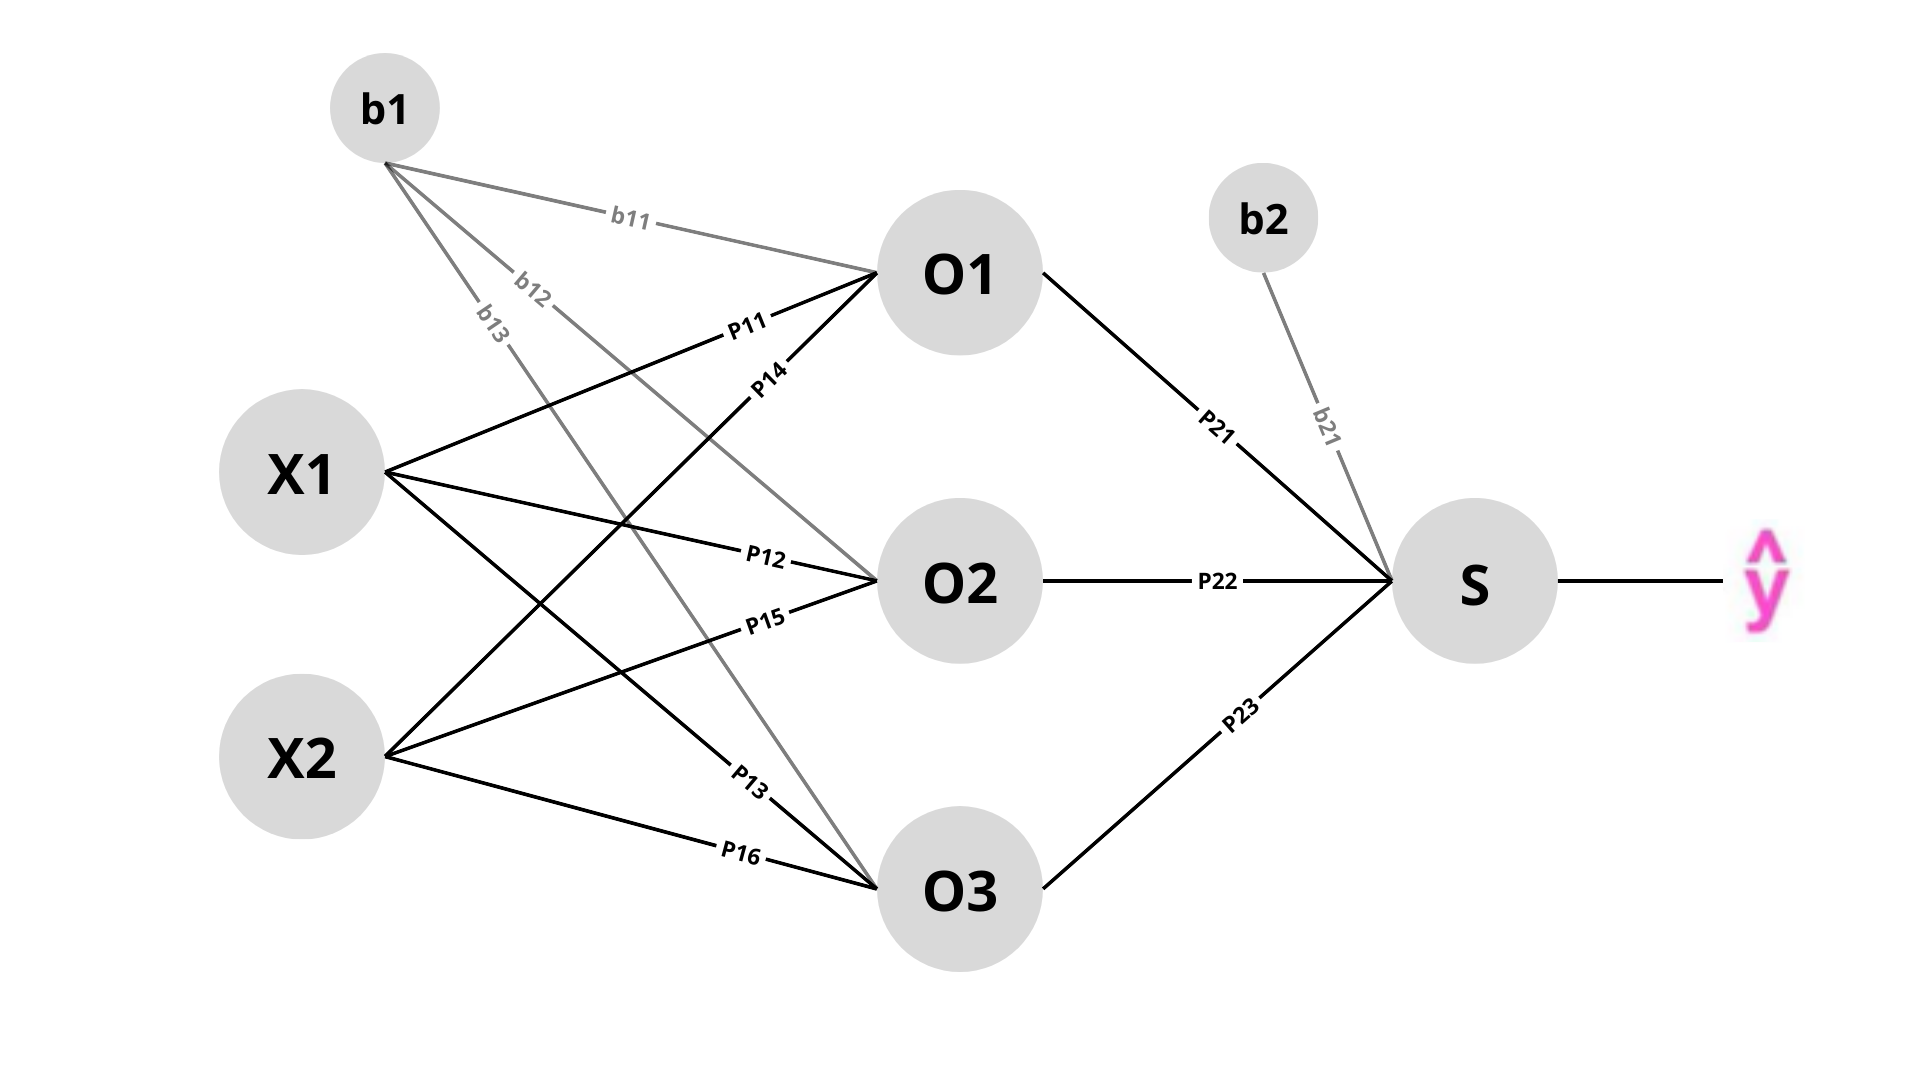

- las ecuaciones generales para hacer el paso hacia adelante (forward pass) y las ecuaciones generales para hacer el paso hacia atrás (backward pass), ambas necesarias para aplicar el algoritmo de Backpropagation esta dada por:

  - Se agrega la ecuacion de la neurona O3 para el paso hacia adelante (forward pass):
  $$ o_3 = x_0 \cdot w_{12} + x_1 \cdot w_{15} + b_3 $$
  - Se agregan las siguientes ecuaciones para hacer el paso hacia atras (backward pass):
  $$
\frac{\partial E}{\partial P_{23}} = (y_{\hat{}} - y) \cdot (y_{\hat{}} \cdot (1 - y_{\hat{}})) \cdot salida_{o3}
$$

$$
\frac{\partial E}{\partial P_{13}} = (y_{\hat{}} - y) \cdot (y_{\hat{}} \cdot (1 - y_{\hat{}})) \cdot P_{23} \cdot (salida_{o3} \cdot (1 - salida_{o3})) \cdot x_0
$$

$$
\frac{\partial E}{\partial P_{16}} = (y_{\hat{}} - y) \cdot (y_{\hat{}} \cdot (1 - y_{\hat{}})) \cdot P_{23} \cdot (salida_{o3} \cdot (1 - salida_{o3})) \cdot x_1
$$

$$
\frac{\partial E}{\partial sesgo_{13}} = (y_{\hat{}} - y) \cdot (y_{\hat{}} \cdot (1 - y_{\hat{}})) \cdot P_{23} \cdot (salida_{o3} \cdot (1 - salida_{o3})) \cdot 1
$$


In [ ]:
# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(6)
    self.sesgos1 = np.random.rand(3)
    self.pesos2 = np.random.rand(3)
    self.sesgos2 = np.random.rand(1)

  def entrenamiento(self, tasa_aprendizaje=0.1, epocas=3000):
    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[3] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[4] + self.sesgos1[1]
        suma_o3 = self.x[i][0]*self.pesos1[2] + self.x[i][1]*self.pesos1[5] + self.sesgos1[2]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        salida_o3 = 1/(1 + np.exp(-suma_o3))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_p23 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o3
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p15 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][0]
        gradiente_p16 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][1]
        gradiente_sesgo13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.pesos1[4] -= tasa_aprendizaje * gradiente_p15
        self.pesos1[5] -= tasa_aprendizaje * gradiente_p16

        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.sesgos1[2] -= tasa_aprendizaje * gradiente_sesgo13

        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.pesos2[2] -= tasa_aprendizaje * gradiente_p23

        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")

  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[3] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[4] + self.sesgos1[1]
    suma_o3 = x1*self.pesos1[2] + x2*self.pesos1[5] + self.sesgos1[2]

    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    salida_o3 = 1/(1 + np.exp(-suma_o3))

    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
red_neuronal.entrenamiento()

##Prueba 1

Para esta primera prueba usaremos una tasa de aprendizaje de 0.9 y 10000 epocas

In [ ]:
# Libreria para obtener el tiempo que toma completar el entrenamiento
import time

# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(6)
    self.sesgos1 = np.random.rand(3)
    self.pesos2 = np.random.rand(3)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):

    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[3] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[4] + self.sesgos1[1]
        suma_o3 = self.x[i][0]*self.pesos1[2] + self.x[i][1]*self.pesos1[5] + self.sesgos1[2]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        salida_o3 = 1/(1 + np.exp(-suma_o3))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_p23 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o3
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p15 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][0]
        gradiente_p16 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][1]
        gradiente_sesgo13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.pesos1[4] -= tasa_aprendizaje * gradiente_p15
        self.pesos1[5] -= tasa_aprendizaje * gradiente_p16

        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.sesgos1[2] -= tasa_aprendizaje * gradiente_sesgo13

        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.pesos2[2] -= tasa_aprendizaje * gradiente_p23

        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")



  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    suma_o3 = x1*self.pesos1[2] + x2*self.pesos1[5] + self.sesgos1[2]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    salida_o3 = 1/(1 + np.exp(-suma_o3))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.9,10000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")

Streaming output truncated to the last 5000 lines.
  23.9827833 ], [-26.94919839  19.07705328 -18.79867106]
Bias actualizados: [ 16.53301675 -17.49172987   5.45869058], [3.73302023]
Error de la red: 0.2465364127467538

Epoch 9446
Pesos iniciales: [ 12.57556584  16.47000688 -37.57941154 -43.19938138   8.11145802
  23.9827833 ], [-26.94919839  19.07705328 -18.79867106]
Bias iniciales: [ 16.53301675 -17.49172987   5.45869058], [3.73302023]
Pesos actualizados: [ 12.57488441  16.47144467 -37.58140551 -43.20381005   8.11075695
  23.98453629], [-26.95085687  19.07754666 -18.79932566]
Bias actualizados: [ 16.53624936 -17.49195088   5.45879621], [3.73349201]
Error de la red: 0.24652530605782796

Epoch 9447
Pesos iniciales: [ 12.57488441  16.47144467 -37.58140551 -43.20381005   8.11075695
  23.98453629], [-26.95085687  19.07754666 -18.79932566]
Bias iniciales: [ 16.53624936 -17.49195088   5.45879621], [3.73349201]
Pesos actualizados: [ 12.57420281  16.47288258 -37.58339946 -43.20823943   8.11005

##Prueba 2

Para esta segunda prueba usaremos una tasa de aprendizaje de 0.2 y 8000 epocas

In [ ]:
# Libreria para obtener el tiempo que toma completar el entrenamiento
import time

# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(6)
    self.sesgos1 = np.random.rand(3)
    self.pesos2 = np.random.rand(3)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):

    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[3] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[4] + self.sesgos1[1]
        suma_o3 = self.x[i][0]*self.pesos1[2] + self.x[i][1]*self.pesos1[5] + self.sesgos1[2]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        salida_o3 = 1/(1 + np.exp(-suma_o3))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_p23 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o3
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p15 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][0]
        gradiente_p16 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][1]
        gradiente_sesgo13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.pesos1[4] -= tasa_aprendizaje * gradiente_p15
        self.pesos1[5] -= tasa_aprendizaje * gradiente_p16

        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.sesgos1[2] -= tasa_aprendizaje * gradiente_sesgo13

        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.pesos2[2] -= tasa_aprendizaje * gradiente_p23

        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")



  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    suma_o3 = x1*self.pesos1[2] + x2*self.pesos1[5] + self.sesgos1[2]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    salida_o3 = 1/(1 + np.exp(-suma_o3))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.2,8000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")

Streaming output truncated to the last 5000 lines.
  11.1648855 ], [-14.47439245  12.35951006 -14.64084774]
Bias actualizados: [  3.61051444 -15.31282702   0.97748563], [3.92855621]
Error de la red: 0.34697480014517895

Epoch 7446
Pesos iniciales: [  9.27879484   9.17128358 -15.67488085 -17.87158651  10.13412382
  11.1648855 ], [-14.47439245  12.35951006 -14.64084774]
Bias iniciales: [  3.61051444 -15.31282702   0.97748563], [3.92855621]
Pesos actualizados: [  9.27975818   9.17170145 -15.67599098 -17.87280482  10.13427717
  11.16568839], [-14.47537078  12.36030189 -14.64164026]
Bias actualizados: [  3.61062344 -15.31315578   0.97766176], [3.92881568]
Error de la red: 0.3469387463200126

Epoch 7447
Pesos iniciales: [  9.27975818   9.17170145 -15.67599098 -17.87280482  10.13427717
  11.16568839], [-14.47537078  12.36030189 -14.64164026]
Bias iniciales: [  3.61062344 -15.31315578   0.97766176], [3.92881568]
Pesos actualizados: [  9.28072117   9.17211931 -15.67710091 -17.87402295  10.13443

##Prueba 3

Para esta tercera prueba usaremos una tasa de aprendizaje de 0.7 y 1000 epocas

In [ ]:
# Libreria para obtener el tiempo que toma completar el entrenamiento
import time

# Para reproducibilidad
np.random.seed(0)

class RedNeuronal:
  def __init__(self, x, y):
    # Datos de entrenamiento y etiquetas
    self.x = x_modificado # Características de entrada
    self.y = y_modificado # Etiquetas de salida

    # estructura de la red e inicialización aleatoria de los pesos
    self.pesos1 = np.random.rand(6)
    self.sesgos1 = np.random.rand(3)
    self.pesos2 = np.random.rand(3)
    self.sesgos2 = np.random.rand(1)

  # La tasa de aprendizaje y el numero de epocas se la pasaremos a la funcion al momento de invocarla
  def entrenamiento(self, tasa_aprendizaje, epocas):

    # entrenamiento por k epocas
    for k in range(epocas):
      error = 0

      # Guardar pesos y sesgos iniciales
      pesos1_inicial = self.pesos1.copy()
      sesgos1_inicial = self.sesgos1.copy()
      pesos2_inicial = self.pesos2.copy()
      sesgos2_inicial = self.sesgos2.copy()

      # Para cada epoca k:
      # 1) haz propagación hacia adelante con cada instancia i
      # 2) calcula el error cuadrático y los gradientes
      # 3) actualiza los pesos
      for i in range(self.x.shape[0]):
        # Entradas a las neuronas sigmoides ocultas
        suma_o1 = self.x[i][0]*self.pesos1[0] + self.x[i][1]*self.pesos1[3] + self.sesgos1[0]
        suma_o2 = self.x[i][0]*self.pesos1[1] + self.x[i][1]*self.pesos1[4] + self.sesgos1[1]
        suma_o3 = self.x[i][0]*self.pesos1[2] + self.x[i][1]*self.pesos1[5] + self.sesgos1[2]
        # Salidas de las neuronas sigmoides ocultas
        salida_o1 =  1/(1 + np.exp(-suma_o1))
        salida_o2 = 1/(1 + np.exp(-suma_o2))
        salida_o3 = 1/(1 + np.exp(-suma_o3))
        # Entrada de la neurona sigmoide de la capa de salida
        suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
        # Salida de la red neuronal
        y_gorro = 1/(1 + np.exp(-suma_s))

        # Cálculo del error cuadrático
        error += (1/2)*(self.y[i] - y_gorro)**2

        # Cálculo de los gradientes
        gradiente_p21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o1
        gradiente_p22 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o2
        gradiente_p23 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * salida_o3
        gradiente_sesgo21 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * 1

        gradiente_p11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][0]
        gradiente_p14 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * self.x[i][1]
        gradiente_sesgo11 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[0] * (salida_o1 * (1 - salida_o1)) * 1

        gradiente_p12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][0]
        gradiente_p15 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * self.x[i][1]
        gradiente_sesgo12 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[1] * (salida_o2 * (1 - salida_o2)) * 1

        gradiente_p13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][0]
        gradiente_p16 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                         self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * self.x[i][1]
        gradiente_sesgo13 = (y_gorro - self.y[i]) * (y_gorro * (1 - y_gorro)) * \
                             self.pesos2[2] * (salida_o3 * (1 - salida_o3)) * 1

        # Actualización de los pesos
        self.pesos1[0] -= tasa_aprendizaje * gradiente_p11
        self.pesos1[1] -= tasa_aprendizaje * gradiente_p12
        self.pesos1[2] -= tasa_aprendizaje * gradiente_p13
        self.pesos1[3] -= tasa_aprendizaje * gradiente_p14
        self.pesos1[4] -= tasa_aprendizaje * gradiente_p15
        self.pesos1[5] -= tasa_aprendizaje * gradiente_p16

        self.sesgos1[0] -= tasa_aprendizaje * gradiente_sesgo11
        self.sesgos1[1] -= tasa_aprendizaje * gradiente_sesgo12
        self.sesgos1[2] -= tasa_aprendizaje * gradiente_sesgo13

        self.pesos2[0] -= tasa_aprendizaje * gradiente_p21
        self.pesos2[1] -= tasa_aprendizaje * gradiente_p22
        self.pesos2[2] -= tasa_aprendizaje * gradiente_p23

        self.sesgos2[0] -= tasa_aprendizaje * gradiente_sesgo21

      # Imprimir información del epoch
      print(f"Epoch {k+1}")
      print(f"Pesos iniciales: {pesos1_inicial}, {pesos2_inicial}")
      print(f"Bias iniciales: {sesgos1_inicial}, {sesgos2_inicial}")
      print(f"Pesos actualizados: {self.pesos1}, {self.pesos2}")
      print(f"Bias actualizados: {self.sesgos1}, {self.sesgos2}")
      print(f"Error de la red: {error}\n")



  def clasificacion(self, x1, x2):
    # Propagación hacia adelante con la nueva instancia (x1, x2) a evaluar
    suma_o1 = x1*self.pesos1[0] + x2*self.pesos1[2] + self.sesgos1[0]
    suma_o2 = x1*self.pesos1[1] + x2*self.pesos1[3] + self.sesgos1[1]
    suma_o3 = x1*self.pesos1[2] + x2*self.pesos1[5] + self.sesgos1[2]
    salida_o1 = 1/(1 + np.exp(-suma_o1))
    salida_o2 = 1/(1 + np.exp(-suma_o2))
    salida_o3 = 1/(1 + np.exp(-suma_o3))
    suma_s = salida_o1*self.pesos2[0] + salida_o2*self.pesos2[1] + salida_o3*self.pesos2[2] + self.sesgos2[0]
    y_gorro = 1/(1 + np.exp(-suma_s))
    return round(y_gorro)

# Crea una Red Neuronal Artificial
red_neuronal = RedNeuronal(x_modificado, y_modificado)
tiempo_incio = time.perf_counter()
red_neuronal.entrenamiento(0.7,1000)
tiempo_final = time.perf_counter()
print(f"Tiempo de entrenamiento: {tiempo_final - tiempo_incio} segundos")

Streaming output truncated to the last 5000 lines.
Pesos actualizados: [ 3.76445959  7.75502946 -8.78871231 -9.19222642  8.67508787  2.50635766], [-6.50904421  8.6654564  -6.54885377]
Bias actualizados: [  2.10262895 -14.69268628   2.76343173], [1.38865647]
Error de la red: 1.7369406350608647

Epoch 441
Pesos iniciales: [ 3.76445959  7.75502946 -8.78871231 -9.19222642  8.67508787  2.50635766], [-6.50904421  8.6654564  -6.54885377]
Bias iniciales: [  2.10262895 -14.69268628   2.76343173], [1.38865647]
Pesos actualizados: [ 3.79895343  7.7617861  -8.83569038 -9.22952747  8.67236482  2.54744351], [-6.54422752  8.66611642 -6.58905777]
Bias actualizados: [  2.10024265 -14.694442     2.76233372], [1.41305982]
Error de la red: 1.7202751085329075

Epoch 442
Pesos iniciales: [ 3.79895343  7.7617861  -8.83569038 -9.22952747  8.67236482  2.54744351], [-6.54422752  8.66611642 -6.58905777]
Bias iniciales: [  2.10024265 -14.694442     2.76233372], [1.41305982]
Pesos actualizados: [ 3.83321317  7.768

##Analisis

En la siguiente tabla se muestran los resultados obtenidos para cada prueba:

| Prueba | Tasa de aprendizaje | Épocas | Error | Tiempo (Seg) |
|:------:|:-------------------:|:------:|:-----:|:-----------:|
|   1    | 0.9                | 10000  | 0.2392 | 69.16     |
|   2    | 0.2                | 8000   | 0.3288 | 50.32      |
|   3    | 0.7                | 1000   | 0.5024 | 5.96       |

En la siguiente tabla se muestran los pesos y bias finales de cada prueba:
- Obersvación: los pesos y los bias estan distribuidos de la siguiente manera:
  - [pesos 1], [pesos 2]
  - [bias 1], [bias 2]

| Prueba | Pesos Finales | Bias Finales |
|:------:|:-------------:|:------------:|
|   1    |[ 12.17, 17.28, -38.68, -45.77, 7.75, 24.99], [ -27.85, 19.33, -19.19] | [ 18.41, -17.65, 5.48], [4.02] |
|   2    | [ 9.76, 9.39, -16.26, -18.52, 10.21, 11.58], [ -14.98, 12.80, -15.04] | [  3.68, -15.50,  1.07], [4.07] |
|   3    | [  8.80, 9.30, -15.59, -15.90,  9.01, 9.06], [ -13.13,  9.51, -12.99] | [  2.33, -14.32,  2.14], [2.65] |


----
- Se evidencio que al agregar una neurona mas en la red neuronal, su rendimiento puede verse alterado para bien y para mal en algunos casos, esto se puede deber a ciertos factores tales como:

 - Agregar una neurona aumenta la cantidad de pesos y bias a aprender, lo que hace que la optimización sea más compleja y la convergencia más lenta, esto se evidencio probando con una tasa de aprendizaje de 0.1 y 3000 epochs el cual la red lanzo un error de 3.07334 en comparacion a cuando tenia dos neuronas que con la misma tasa y los mismos epochs lanzo un error de 1.0231. Esto nos puede decir que hay que ajustar bien la tasa de aprendizaje con la que va a entrenar la red neuronal ya que de lo contrario quizas el rendimiento se vea afectado.

 - Hablando de las pruebas que se hicieron, se pudo evidenciar que al ajustar y crecer aun mas la tasa de aprendizaje, la red neuronal puede converger mas facil a un error por debajo de 1 sin mucha dificultad y sin muchos epochs, de hecho con una tasa de aprendizaje de 0.6 y 500 epochs, la red ya lanza un error por debajo de 1.

 - En la prueba 1 al ser una tasa de aprendizaje tan alta, la red ajusto los pesos de manera muy agresiva dando como resultado que incluso antes de los 800 epochs ya la red estuviera por debajo de 1 en su error calculado, y desde ahi empezo a converger de manera muy lenta, tanto asi que aproximadamente en los 4000 epochs ya el error se encontraba por debajo de 0.4, y como se pudo evidenciar en su error final de 0.2392 que por mas epochs que se agreguen ya la red no va a disminuir su error de manera optima.

 - En la prueba 2 ya se estabiliza un poco la relacion entre la tasa de aprendizaje con el error lanzado en cada epoch, es decir, los pesos se van ajustando de manera mas suave, logrando asi un comportamiento bastante eficaz ya que aproximadamente desde los 4500 epochs ya el error estaba por debajo de 1, quizas no llega a alcanzar el optimo global debido a la baja tasa de aprendizaje pero en general se comporto de manera optima, mas no mas optima que la prueba 1.

 - La prueba 3 fue la que peor rendimiento tuvo de las 3 y esto se debe a dos factores muy importantes, primero, los pesos se ajustaban de manera muy agresiva gracias a la tasa de aprendizaje alta, y segundo, se evidencia una falta de entrenamiento en la red ya que al contar con 1000 epochs se queda algo corto en el entrenamiento de la red neuronal y mas contando con 3 neuronas en su capa oculta que como ya se menciono al no tener suficiente entrenamiento su rendimiento puede verse afectado.

- Comparando la red neuronal con 3 neuronas en su capa oculta con respecto a la que solo tiene 2 neuronas, se puede concluir lo siguiente:
  
  -  La red con 2 neuronas en la capa oculta logró un error mucho menor con respecto a la prueba 1 con 3 neuronas en su capa oculta (0.0047 vs. 0.2392) en la mejor prueba (prueba 1), lo que sugiere que menos neuronas fueron suficientes para capturar la relación en los puntos.

  - El tiempo de entrenamiento fue menor con 2 neuronas (45.35 seg vs. 69.16 seg en la mejor prueba), indicando que una arquitectura más simple fue más eficiente sin sacrificar precisión, sin embargo, el error lanzado por la red con 3 neuronas fue menor al error lanzado por la red con 2 neuronas.

  - Con pocas épocas (Prueba 3), ambas redes tuvieron errores altos, pero la red con 2 neuronas empeoró más (0.5619 vs. 0.5024), sugiriendo que con menos neuronas se necesita más entrenamiento para alcanzar un buen ajuste.



#Punto 4



En los resultados de tiempos de los puntos 2 y 3, podemos ver que a medida que agregamos mas capas ocultas el tiempo de entrenamiento tiende a ser mayor, por lo cual para redes neuronales mas complejas esta implementacion podria ser ineficiente en cuanto a tiempo.

Para ello algunos de los cambios propuestos por el equipo son los siguientes:

- Se podria definir la funcion sigmoide, de tal manera que no sea necesario escrbirla en la definicion de cada una de las salidas. Esto incluso facilitaria el cambio de funcion de activacion.

```
salida_o = sigmoide(suma_o)
```
- En la implementacion se usan ciclos anidados, esto puede aumentar considerablemente el tiempo te entrenamiento, en su lugar, podriamos ver las operaciones salida_o como un producto punto usando la libreri NumPy asi:

```
suma_s = np.dot(salida_o, self.pesos2) + self.sesgos2
```
Los cambios anteriores permite calculos mas eficientes en un tiempo de entrenamiento mas pequeño.
